<a href="https://colab.research.google.com/github/AlejandroPSJ2/Data_Mining/blob/clustering/Clase2_clustering_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#LIBRERIAS BASICAS

from google.colab import files
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
# FUNCIONES PARA CLUSTERING

def normalize(df):
    dfb = df.copy()
    for x in df.columns:
        dfb[x] = (df[x]-df[x].min())/(df[x].max()-df[x].min())
    return dfb   
    
def centroides(a,b):
    res = pd.DataFrame(data=b)
    i=0
    for x in a.columns:
        res.rename(columns={i:x},inplace=True)
        i = i+1
    res.reset_index(inplace=True)
    res.rename(columns={'index':'cluster'},inplace=True)
    return res 
    
def clusteres(a,b): 
    lab = pd.DataFrame(data=b)
    ax = a.join(lab)
    ax.rename(columns={0:'cluster'},inplace=True)  
    return ax

def elbow(X):
    sum_of_squared_distances = []
    K = range(1,15)
    for k in K:
        k_means = KMeans(n_clusters=k)
        model = k_means.fit(X)
        sum_of_squared_distances.append(k_means.inertia_)

    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('sum_of_squared_distances')
    plt.title('elbow method for optimal k')
    plt.show()
    return sum_of_squared_distances

def silhouette(X):
    sil = []
    K = range(2, 15)
    for k in K:
      kmeans = KMeans(n_clusters = k).fit(X)
      labels = kmeans.labels_
      sil.append(silhouette_score(X, labels, metric = 'euclidean'))

    plt.plot(K, sil, 'bx-')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.title('silhouette method for optimal k')
    plt.show()
    return sil

In [3]:
#DATA LOADING & PREVIEW

url = 'https://raw.githubusercontent.com/AlejandroPSJ2/Data_Mining/main/clustering_categorical_clean.csv'
df = pd.read_csv(url,sep=';')
df.head()

,id,age,fnlwgt,education-num,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,236,42,303044,9,Other,Male,0,0,40,Other
1,1820,40,121956,13,Other,Male,13550,0,40,Other
2,3945,37,191342,2,Other,Male,0,0,40,Other
3,4380,25,228608,10,Other,Female,0,0,40,Other
4,104,56,335605,9,White,Male,0,1887,50,Other


In [7]:
#DATA PREPARATION (VERY IMPORTANT TO DIFFERENTIATE "X" AND "DF")

X = df.drop(columns='id')
#X = pd.get_dummies(X)               #ONE HOT ENCODING SI HAY CATEGORICAS
X = normalize(X)

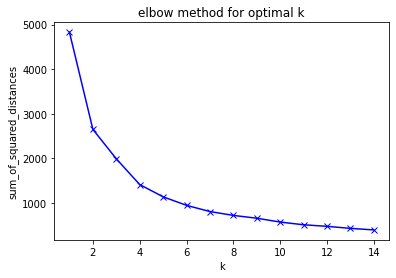

[4828.679942931379, 2649.26672544254, 1989.0418139763974, 1410.7073791875707, 1135.5509327085401, 944.2632955464717, 804.7863166512768, 718.1647230802607, 655.2373420274961, 568.8583250137152, 507.9203437382005, 473.04552636214066, 427.30750623849775, 392.4474350548269]


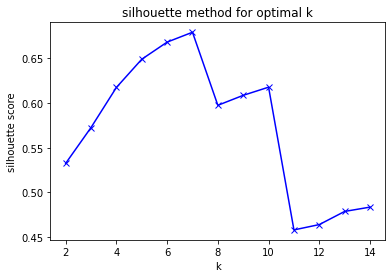

[0.5325266310986279, 0.5726610638264086, 0.6174671591781556, 0.649064361363735, 0.668226436997622, 0.6792685463451184, 0.5975040061153848, 0.6086676357426518, 0.6177859516973646, 0.4580485577200057, 0.46402918298044865, 0.47873884355484725, 0.48356754920145917]


In [9]:
# OPTIMAL NUMBER "K" OF CLUSTERS

print(elbow(X))
print(silhouette(X))

In [10]:
# ALGORITHM FIT

kmeans = KMeans(n_clusters=5, random_state=44).fit(X)

In [11]:
# CLUSTER CENTROIDS   ### SE PUEDE OBVIAR

print('Centroides optimos de clusteres')
print(centroides(X,kmeans.cluster_centers_))

Centroides optimos de clusteres
   cluster       age  ...  native-country_Other  native-country_USA
0        0  0.278315  ...          1.000000e+00       -4.218847e-15
1        1  0.306101  ...          3.830269e-15        1.000000e+00
2        2  0.275500  ...         -1.457168e-15        1.000000e+00
3        3  0.294477  ...          2.498002e-16        1.000000e+00
4        4  0.269094  ...          1.000000e+00        1.443290e-15

[5 rows x 14 columns]


In [12]:
# CLUSTER RESULTS    ### SE PUEDE OBVIAR

print('Asignacion de clusteres segun cada observacion')
print(clusteres(df,kmeans.labels_).head())

Asignacion de clusteres segun cada observacion
     id  age  fnlwgt  ...  hours-per-week native-country cluster
0   236   42  303044  ...              40          Other       0
1  1820   40  121956  ...              40          Other       0
2  3945   37  191342  ...              40          Other       0
3  4380   25  228608  ...              40          Other       4
4   104   56  335605  ...              50          Other       0

[5 rows x 11 columns]


In [ ]:
# EXPORT RESULTS
centroides(X,kmeans.cluster_centers_).to_csv('centroides.csv') 
files.download('centroides.csv')

clusteres(df,kmeans.labels_).to_csv('resultados.csv') 
files.download('resultados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#from google.colab import drive
#drive.mount("/content/gdrive")
